In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import pandas as pd

In [11]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Пути к директориям
train_dir = "test"
valid_dir = "valid"
test_dir = "test"

# Создание списков изображений
train_images = [os.path.join(train_dir, file) for file in os.listdir(train_dir)]
valid_images = [os.path.join(valid_dir, file) for file in os.listdir(valid_dir)]
test_images = [os.path.join(test_dir, file) for file in os.listdir(test_dir)]

# Создание DataFrames
train_data = pd.DataFrame({"image": train_images})
valid_data = pd.DataFrame({"image": valid_images})
test_data = pd.DataFrame({"image": test_images})

# Объедините все изображения в один DataFrame
all_images = pd.concat([train_data, valid_data])

# Разделите изображения на обучающую и валидационную выборки
train_df, val_df = train_test_split(all_images, train_size=0.8, shuffle=True, random_state=123)


In [12]:
image_datagen = ImageDataGenerator(rescale=1./255)
mask_datagen = ImageDataGenerator(rescale=1./255)

def create_generator(image_generator, mask_generator, batch_size=16):
    while True:
        for (img_batch, mask_batch) in zip(image_generator, mask_generator):
            yield img_batch, mask_batch

In [19]:
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.layers import Dropout

def unet_model_v1(input_size=(128, 128, 3), num_classes=6):
    inputs = Input(input_size)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    c1 = Dropout(0.2)(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)
    
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    c2 = Dropout(0.2)(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)
    
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    c3 = Dropout(0.3)(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)
    
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    c4 = Dropout(0.3)(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)
    
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)
    c5 = Dropout(0.4)(c5)
    
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)
    c6 = Dropout(0.3)(c6)
    
    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)
    c7 = Dropout(0.3)(c7)
    
    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)
    c8 = Dropout(0.2)(c8)
    
    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)
    c9 = Dropout(0.2)(c9)
    
    outputs = layers.Conv2D(num_classes, (1, 1), activation='softmax')(c9)
    
    model = Model(inputs=[inputs], outputs=[outputs])
    return model


def unet_model_v2(input_size=(128, 128, 3), num_classes=6):
    inputs = Input(input_size)
    c1 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c1)
    c1 = Dropout(0.2)(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)
    
    c2 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c2)
    c2 = Dropout(0.2)(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)
    
    c3 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c3)
    c3 = Dropout(0.3)(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)
    
    c4 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c4)
    c4 = Dropout(0.3)(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)
    
    c5 = layers.Conv2D(2048, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(2048, (3, 3), activation='relu', padding='same')(c5)
    c5 = Dropout(0.4)(c5)
    
    u6 = layers.Conv2DTranspose(1024, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c6)
    c6 = Dropout(0.3)(c6)
    
    u7 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c7)
    c7 = Dropout(0.3)(c7)
    
    u8 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c8)
    c8 = Dropout(0.2)(c8)
    
    u9 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c9)
    c9 = Dropout(0.2)(c9)
    
    outputs = layers.Conv2D(num_classes, (1, 1), activation='softmax')(c9)
    model = Model(inputs=[inputs], outputs=[outputs])
    return model


In [ ]:
import os
import numpy as np
import tensorflow as tf
import cv2  # Убедитесь, что OpenCV установлен: pip install opencv-python

def load_images_and_masks(images_dir, masks_dir, target_size, num_classes):
    image_paths = sorted([os.path.join(images_dir, f) for f in os.listdir(images_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
    mask_paths = sorted([os.path.join(masks_dir, f) for f in os.listdir(masks_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

    images = []
    masks = []

    # Словарь цветов и соответствующих им классов (пример)
    color_to_class = {
        (255, 0, 0): 0,       # Красный
        (0, 255, 0): 1,       # Зеленый
        (0, 0, 255): 2,       # Синий
        (255, 255, 0): 3,     # Желтый
        (255, 0, 255): 4,     # Фиолетовый
        (0, 255, 255): 5      # Голубой
    }

    for img_path, mask_path in zip(image_paths, mask_paths):
        # Загрузка RGB изображения
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=target_size, color_mode='rgb')
        img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # нормализация
        images.append(img_array)

        # Загрузка цветной маски через OpenCV (BGR формат)
        mask = cv2.imread(mask_path)
        mask = cv2.resize(mask, target_size)
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)  # Переводим в RGB, чтобы цвета совпадали

        # Создаем пустую маску классов
        mask_class = np.zeros((target_size[1], target_size[0]), dtype='int32')

        # Проходим по всем пикселям и сопоставляем цвет классу
        for i in range(target_size[1]):
            for j in range(target_size[0]):
                pixel = tuple(mask[i, j])
                mask_class[i, j] = color_to_class.get(pixel, 0)  # Если цвет не найден, ставим класс 0

        masks.append(mask_class)

    images = np.array(images)
    masks = np.array(masks)

    # Преобразование масок в one-hot encoding
    masks_one_hot = np.zeros((len(masks), target_size[0], target_size[1], num_classes), dtype='float32')
    for i, mask in enumerate(masks):
        for j in range(num_classes):
            masks_one_hot[i, :, :, j] = (mask == j)

    return images, masks_one_hot



# Пути к данным
TRAIN_IMAGES_DIR = 'C:\\led\\train'
TRAIN_MASKS_DIR = 'C:\\led\\train\\masks'
VALID_IMAGES_DIR = 'C:\\led\\valid'
VALID_MASKS_DIR = 'C:\\led\\valid\\masks'

TARGET_SIZE = (128, 128)
NUM_CLASSES = 6

train_images, train_masks = load_images_and_masks(TRAIN_IMAGES_DIR, TRAIN_MASKS_DIR, TARGET_SIZE, NUM_CLASSES)
valid_images, valid_masks = load_images_and_masks(VALID_IMAGES_DIR, VALID_MASKS_DIR, TARGET_SIZE, NUM_CLASSES)


Training unet_model_v1 with lr=0.001 and batch_size=16
Epoch 1/50


c:\Users\Екатерина\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_73']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


10/10 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.2183 - iou_metric: 0.0688 - loss: 3.1978 - val_accuracy: 0.3854 - val_iou_metric: 0.2028 - val_loss: 1.7077
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.3603 - iou_metric: 0.1533 - loss: 1.7178 - val_accuracy: 0.4631 - val_iou_metric: 0.2095 - val_loss: 1.6735
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.3964 - iou_metric: 0.1776 - loss: 1.6560 - val_accuracy: 0.5243 - val_iou_metric: 0.2468 - val_loss: 1.5573
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.4075 - iou_metric: 0.1411 - loss: 1.5332 - val_accuracy: 0.5194 - val_iou_metric: 0.2795 - val_loss: 1.4691
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.5155 - iou_metric: 0.2191 - loss: 1.3412 - val_accuracy: 0.5491 - val_iou_metric: 0.2817 - val_loss: 1.3050
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.5800 - iou_metric: 0.2291 - loss: 1.1768 - val_accuracy: 0.4364 - val_iou_metric: 0.233

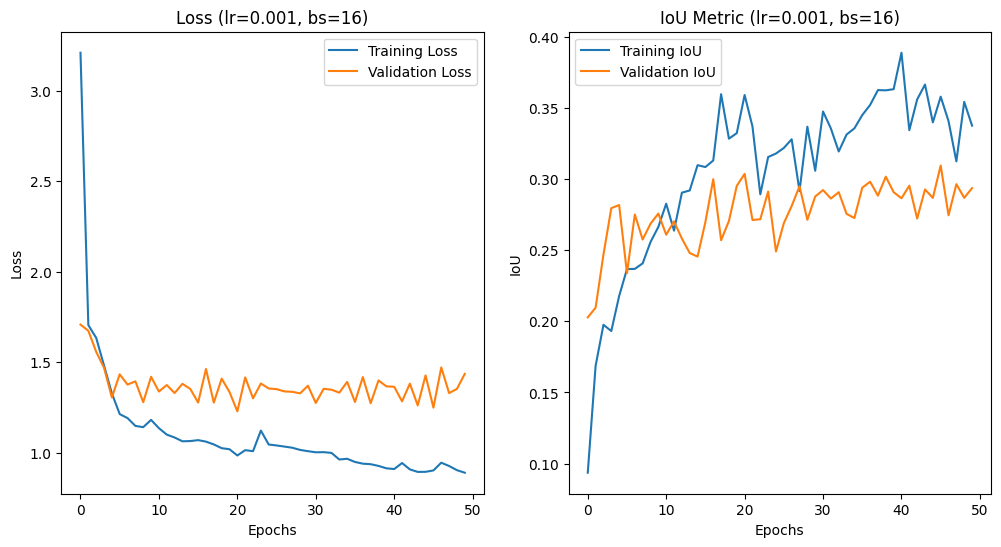

Training unet_model_v1 with lr=0.0001 and batch_size=32
Epoch 1/50


c:\Users\Екатерина\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_114']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


5/5 ━━━━━━━━━━━━━━━━━━━━ 64s 11s/step - accuracy: 0.1984 - iou_metric: 0.0737 - loss: 1.7864 - val_accuracy: 0.2129 - val_iou_metric: 0.0480 - val_loss: 1.7740
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 50s 10s/step - accuracy: 0.3126 - iou_metric: 0.0871 - loss: 1.7573 - val_accuracy: 0.2331 - val_iou_metric: 0.0686 - val_loss: 1.7448
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 50s 10s/step - accuracy: 0.3081 - iou_metric: 0.0764 - loss: 1.6947 - val_accuracy: 0.2059 - val_iou_metric: 0.0458 - val_loss: 1.6622
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 50s 10s/step - accuracy: 0.2772 - iou_metric: 0.0697 - loss: 1.5966 - val_accuracy: 0.2333 - val_iou_metric: 0.0703 - val_loss: 1.6432
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 50s 10s/step - accuracy: 0.2538 - iou_metric: 0.0669 - loss: 1.5630 - val_accuracy: 0.2484 - val_iou_metric: 0.0801 - val_loss: 1.6388
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 39s 7s/step - accuracy: 0.2673 - iou_metric: 0.0701 - loss: 1.5431 - val_accuracy: 0.2408 - val_iou_metric: 0.0741 - val

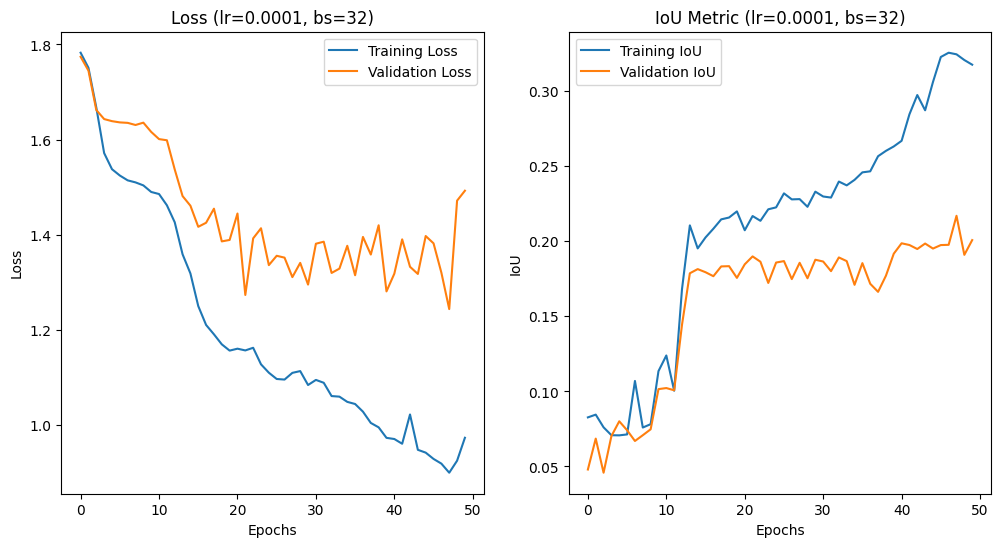

Training unet_model_v1 with lr=1e-05 and batch_size=64
Epoch 1/50


c:\Users\Екатерина\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_155']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


3/3 ━━━━━━━━━━━━━━━━━━━━ 44s 12s/step - accuracy: 0.2510 - iou_metric: 0.0774 - loss: 1.7864 - val_accuracy: 0.4042 - val_iou_metric: 0.1099 - val_loss: 1.7770
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 39s 10s/step - accuracy: 0.2588 - iou_metric: 0.0772 - loss: 1.7843 - val_accuracy: 0.4099 - val_iou_metric: 0.1117 - val_loss: 1.7762
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 8s/step - accuracy: 0.2580 - iou_metric: 0.0771 - loss: 1.7839 - val_accuracy: 0.4155 - val_iou_metric: 0.1134 - val_loss: 1.7755
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 9s/step - accuracy: 0.2576 - iou_metric: 0.0770 - loss: 1.7844 - val_accuracy: 0.4209 - val_iou_metric: 0.1150 - val_loss: 1.7747
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 8s/step - accuracy: 0.2652 - iou_metric: 0.0774 - loss: 1.7819 - val_accuracy: 0.4254 - val_iou_metric: 0.1163 - val_loss: 1.7739
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 9s/step - accuracy: 0.2730 - iou_metric: 0.0788 - loss: 1.7799 - val_accuracy: 0.4292 - val_iou_metric: 0.1176 - val_lo

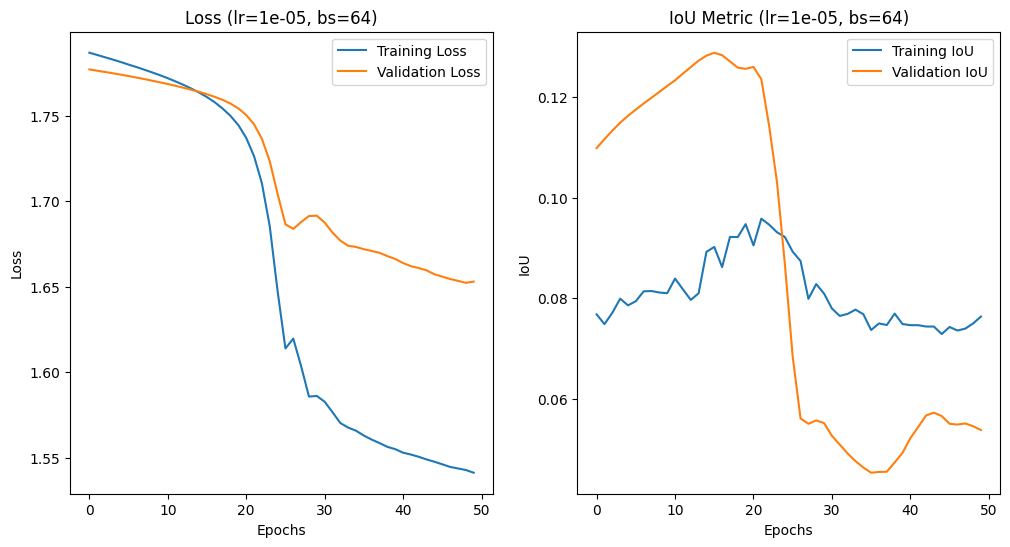

Training unet_model_v2 with lr=0.001 and batch_size=16
Epoch 1/50


c:\Users\Екатерина\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_196']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


10/10 ━━━━━━━━━━━━━━━━━━━━ 126s 12s/step - accuracy: 0.2801 - iou_metric: 0.0863 - loss: 1.8660 - val_accuracy: 0.4673 - val_iou_metric: 0.2302 - val_loss: 1.6788
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 121s 12s/step - accuracy: 0.3906 - iou_metric: 0.1801 - loss: 1.6013 - val_accuracy: 0.2681 - val_iou_metric: 0.1563 - val_loss: 1.5774
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 171s 18s/step - accuracy: 0.4647 - iou_metric: 0.2199 - loss: 1.3653 - val_accuracy: 0.5146 - val_iou_metric: 0.2782 - val_loss: 1.3523
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 218s 22s/step - accuracy: 0.5561 - iou_metric: 0.2453 - loss: 1.2050 - val_accuracy: 0.3919 - val_iou_metric: 0.1967 - val_loss: 1.3636
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 207s 21s/step - accuracy: 0.4988 - iou_metric: 0.2549 - loss: 1.2541 - val_accuracy: 0.5064 - val_iou_metric: 0.2637 - val_loss: 1.2650
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 215s 21s/step - accuracy: 0.6005 - iou_metric: 0.2403 - loss: 1.1260 - val_accuracy: 0.4720 - val_iou_m

AbortedError: Graph execution error:

Detected at node StatefulPartitionedCall/gradient_tape/functional_5_1/conv2d_104_1/convolution/Conv2DBackpropFilter defined at (most recent call last):
<stack traces unavailable>
Operation received an exception:Status: 1, message: could not create a memory object, in file tensorflow/core/kernels/mkl/mkl_conv_grad_filter_ops.cc:685
	 [[{{node StatefulPartitionedCall/gradient_tape/functional_5_1/conv2d_104_1/convolution/Conv2DBackpropFilter}}]] [Op:__inference_multi_step_on_iterator_100649]

In [15]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def iou_metric(y_true, y_pred):
    y_true = tf.argmax(y_true, axis=-1)
    y_pred = tf.argmax(y_pred, axis=-1)
    
    ious = []
    for i in range(NUM_CLASSES):
        true_class = tf.cast(tf.equal(y_true, i), tf.float32)
        pred_class = tf.cast(tf.equal(y_pred, i), tf.float32)
        intersection = tf.reduce_sum(true_class * pred_class)
        union = tf.reduce_sum(true_class) + tf.reduce_sum(pred_class) - intersection
        iou = tf.cond(tf.equal(union, 0), lambda: tf.constant(1.0), lambda: intersection / union)
        ious.append(iou)
    return tf.reduce_mean(ious)

hyperparameters = [
    {'learning_rate': 1e-3, 'batch_size': 16},
    {'learning_rate': 1e-4, 'batch_size': 32},
    {'learning_rate': 1e-5, 'batch_size': 64}
]

model_architectures = [unet_model_v1, unet_model_v2]

INPUT_SHAPE = (TARGET_SIZE[0], TARGET_SIZE[1], 3)

for model_arch in model_architectures:
    for hp in hyperparameters:
        print(f"Training {model_arch.__name__} with lr={hp['learning_rate']} and batch_size={hp['batch_size']}")
        model = model_arch(input_size=INPUT_SHAPE, num_classes=NUM_CLASSES)
        
        model.compile(
            optimizer=Adam(learning_rate=hp['learning_rate'], epsilon=1e-7),
            loss='categorical_crossentropy',
            metrics=[iou_metric, 'accuracy']
        )
        
        history = model.fit(
            train_images, train_masks,
            validation_data=(valid_images, valid_masks),
            epochs=50,
            batch_size=hp['batch_size']
        )
        
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Loss (lr={hp["learning_rate"]}, bs={hp["batch_size"]})')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['iou_metric'], label='Training IoU')
        plt.plot(history.history['val_iou_metric'], label='Validation IoU')
        plt.title(f'IoU Metric (lr={hp["learning_rate"]}, bs={hp["batch_size"]})')
        plt.xlabel('Epochs')
        plt.ylabel('IoU')
        plt.legend()

        plt.show()
        
        model_name = f"{model_arch.__name__}_lr{hp['learning_rate']}_bs{hp['batch_size']}.h5"
        model.save(model_name)


Training unet_model_v1 with lr=0.001 and batch_size=16
Epoch 1/100


c:\Users\Екатерина\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_360']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.2444 - iou_metric: 0.0935 - loss: 2.3552 - val_accuracy: 0.4123 - val_iou_metric: 0.1917 - val_loss: 1.6972
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.4053 - iou_metric: 0.1595 - loss: 1.6549 - val_accuracy: 0.2015 - val_iou_metric: 0.1158 - val_loss: 1.6856
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.2908 - iou_metric: 0.1319 - loss: 1.5942 - val_accuracy: 0.2015 - val_iou_metric: 0.1158 - val_loss: 1.7152
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.3780 - iou_metric: 0.0970 - loss: 1.4879 - val_accuracy: 0.2015 - val_iou_metric: 0.1158 - val_loss: 1.6191
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.3526 - iou_metric: 0.1005 - loss: 1.4640 - val_accuracy: 0.4773 - val_iou_metric: 0.2760 - val_loss: 1.4737
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 57s 6s/step - accuracy: 0.4659 - iou_metric: 0.2515 - loss: 1.3455 - val_accuracy: 0.4505 - val_iou_metric: 

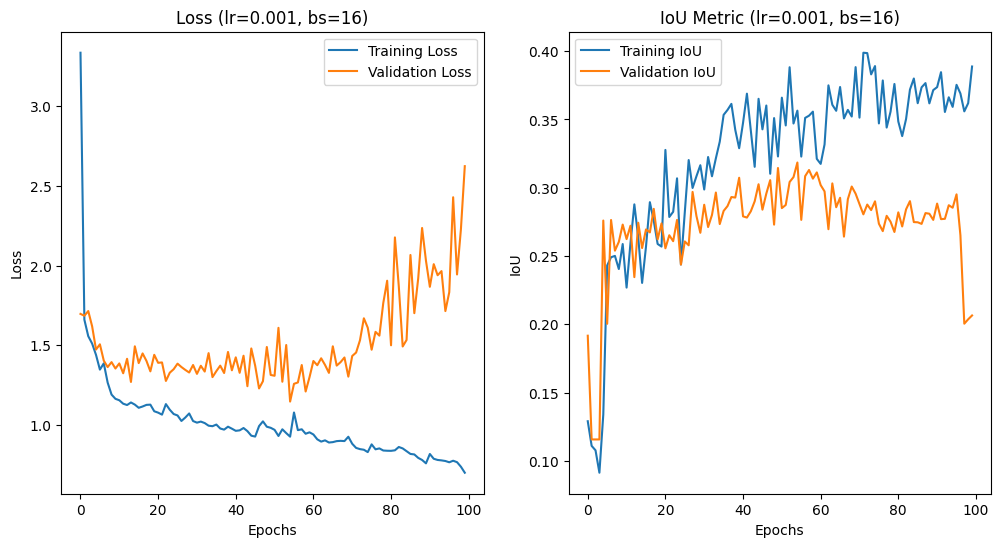

In [20]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def iou_metric(y_true, y_pred):
    y_true = tf.argmax(y_true, axis=-1)
    y_pred = tf.argmax(y_pred, axis=-1)
    
    ious = []
    for i in range(NUM_CLASSES):
        true_class = tf.cast(tf.equal(y_true, i), tf.float32)
        pred_class = tf.cast(tf.equal(y_pred, i), tf.float32)
        intersection = tf.reduce_sum(true_class * pred_class)
        union = tf.reduce_sum(true_class) + tf.reduce_sum(pred_class) - intersection
        iou = tf.cond(tf.equal(union, 0), lambda: tf.constant(1.0), lambda: intersection / union)
        ious.append(iou)
    return tf.reduce_mean(ious)

hyperparameters = [
    {'learning_rate': 1e-3, 'batch_size': 16}
]

model_architectures = [unet_model_v1]

INPUT_SHAPE = (TARGET_SIZE[0], TARGET_SIZE[1], 3)

for model_arch in model_architectures:
    for hp in hyperparameters:
        print(f"Training {model_arch.__name__} with lr={hp['learning_rate']} and batch_size={hp['batch_size']}")
        model = model_arch(input_size=INPUT_SHAPE, num_classes=NUM_CLASSES)
        
        model.compile(
            optimizer=Adam(learning_rate=hp['learning_rate'], epsilon=1e-7),
            loss='categorical_crossentropy',
            metrics=[iou_metric, 'accuracy']
        )
        
        history = model.fit(
            train_images, train_masks,
            validation_data=(valid_images, valid_masks),
            epochs=100,
            batch_size=hp['batch_size']
        )
        
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Loss (lr={hp["learning_rate"]}, bs={hp["batch_size"]})')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['iou_metric'], label='Training IoU')
        plt.plot(history.history['val_iou_metric'], label='Validation IoU')
        plt.title(f'IoU Metric (lr={hp["learning_rate"]}, bs={hp["batch_size"]})')
        plt.xlabel('Epochs')
        plt.ylabel('IoU')
        plt.legend()

        plt.show()
        
        model_name = f"{model_arch.__name__}_lr{hp['learning_rate']}_bs{hp['batch_size']}.h5"
        model.save(model_name)


c:\Users\Екатерина\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:3402: DecompressionBombWarning: Image size (110915528 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


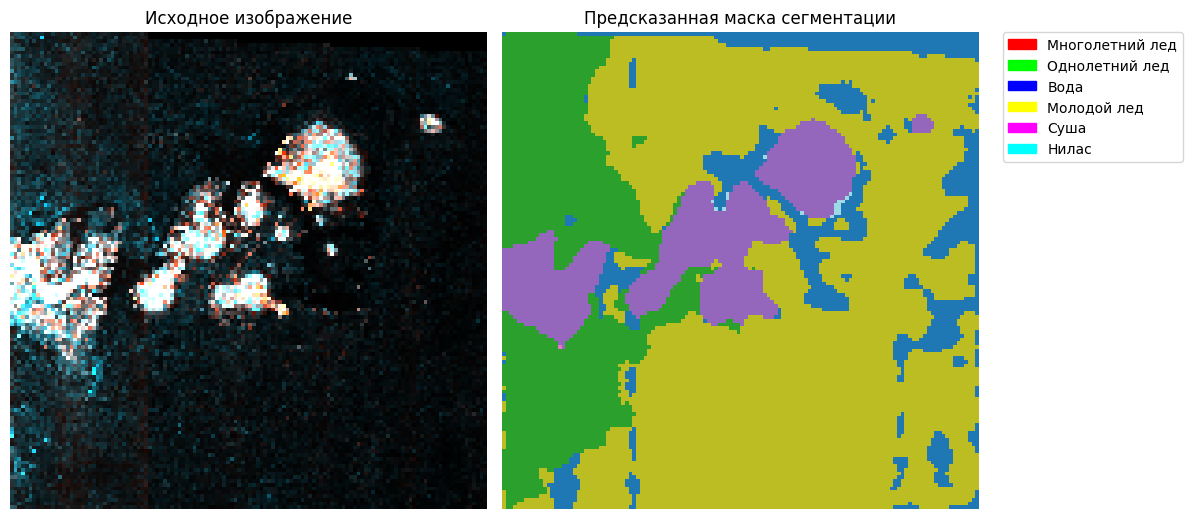

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Определение пользовательской метрики IoU (если она использовалась при обучении)
NUM_CLASSES = 6  # количество классов

def iou_metric(y_true, y_pred):
    y_true = tf.argmax(y_true, axis=-1)
    y_pred = tf.argmax(y_pred, axis=-1)
    
    ious = []
    for i in range(NUM_CLASSES):
        true_class = tf.cast(tf.equal(y_true, i), tf.float32)
        pred_class = tf.cast(tf.equal(y_pred, i), tf.float32)
        intersection = tf.reduce_sum(true_class * pred_class)
        union = tf.reduce_sum(true_class) + tf.reduce_sum(pred_class) - intersection
        iou = tf.cond(tf.equal(union, 0), lambda: tf.constant(1.0), lambda: intersection / union)
        ious.append(iou)
    return tf.reduce_mean(ious)

# Путь к модели
model_path = 'C:\\led\\unet_model_v1_lr0.001_bs16.h5'  # Замените на путь к вашей модели

# Загружаем модель с учётом пользовательской метрики
model = tf.keras.models.load_model(model_path, custom_objects={'iou_metric': iou_metric})

# Путь к новому изображению
image_path = 'C:\\led\\S1A_EW_GRDM_1SDH_20250227T011042_20250227T011146_058075_072BCE_20EA_RGB.png'

# Параметры подготовки изображения
input_size = (128, 128)  # Размер, на который масштабируется изображение (должен совпадать с размером входа модели)
num_classes = 6          # Количество классов сегментации

# Загрузка и подготовка изображения
img = load_img(image_path, target_size=input_size)
img_array = img_to_array(img) / 255.0  # Нормализация в диапазон [0,1]
input_tensor = np.expand_dims(img_array, axis=0)  # Добавляем batch dimension (1, 128, 128, 3)

# Предсказание маски
pred = model.predict(input_tensor)  # shape: (1, H, W, num_classes)

# Получаем метки классов (индексы с максимальной вероятностью)
pred_mask = np.argmax(pred[0], axis=-1)  # shape: (H, W)

# Определение цветов для классов (RGB)
class_colors = [
    (255, 0, 0),       # Красный - Суша
    (0, 255, 0),       # Зеленый - Однолетний лед
    (0, 0, 255),       # Синий - Вода
    (255, 255, 0),     # Желтый - Нилас
    (255, 0, 255),     # Фиолетовый - Многолетний лед
    (0, 255, 255)      # Голубой - Молодой лед
]

class_labels = [
    'Многолетний лед',
    'Однолетний лед',
    'Вода',
    'Молодой лед',
    'Суша',
    'Нилас'
]

# Визуализация результата с легендой
plt.figure(figsize=(12, 6))

# Исходное изображение
plt.subplot(1, 2, 1)
plt.title('Исходное изображение')
plt.imshow(img_array)
plt.axis('off')

# Предсказанная маска
plt.subplot(1, 2, 2)
plt.title('Предсказанная маска сегментации')
plt.imshow(pred_mask, cmap='tab20')
plt.axis('off')

# Создаем легенду с цветами, нормализованными в [0,1]
patches = [mpatches.Patch(color=np.array(color)/255, label=label) for color, label in zip(class_colors, class_labels)]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()
